In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import csv
import codecs
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('marketing_campaign.csv')

df.drop(df.index[[2233,239,339,192,21,1975,1806,1328]], inplace=True)  # Remove outliers
df = df.dropna() # Removing rows with missing values
df.drop(df[df.Marital_Status == "YOLO"].index, inplace=True)
df.drop(df[df.Marital_Status == "Absurd"].index, inplace=True)
df = df[df['Income'] <= 100000]

marital = pd.get_dummies(df['Marital_Status'], drop_first=True)
df = pd.concat([df, marital], axis=1)


education = pd.get_dummies(df['Education'], drop_first=True)
df = pd.concat([df, education], axis=1)

df = df.drop(columns=['Education','Marital_Status'])

# Filling NA columns with data mean since it is well distributed after outliers removed
df['Income'] = df['Income'].fillna(df['Income'].mean())

In [2]:

df = df.drop(columns = ['Z_CostContact', 'Z_Revenue'])

# Changing Date numerically readable values  
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df['Year_joined'] = df['Dt_Customer'].apply(lambda x: x.year)
df['Month_joined'] = df['Dt_Customer'].apply(lambda x: x.month)
df['Day_joined'] = df['Dt_Customer'].apply(lambda x: x.day)
df = df.drop(columns = ['Dt_Customer'])

print(df.columns)
    

Index(['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'Divorced',
       'Married', 'Single', 'Together', 'Widow', 'Basic', 'Graduation',
       'Master', 'PhD', 'Year_joined', 'Month_joined', 'Day_joined'],
      dtype='object')


In [3]:

dfram = df.copy()
dfram = dfram.drop('ID', axis=1)

dfram['Year_Birth'] = dfram['Year_Birth'].map(lambda a: 2015-a)
dfram.head()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Single,Together,Widow,Basic,Graduation,Master,PhD,Year_joined,Month_joined,Day_joined
0,58,58138.0,0,0,58,635,88,546,172,88,...,1,0,0,0,1,0,0,2012,4,9
1,61,46344.0,1,1,38,11,1,6,2,1,...,1,0,0,0,1,0,0,2014,8,3
2,50,71613.0,0,0,26,426,49,127,111,21,...,0,1,0,0,1,0,0,2013,8,21
3,31,26646.0,1,0,26,11,4,20,10,3,...,0,1,0,0,1,0,0,2014,10,2
4,34,58293.0,1,0,94,173,43,118,46,27,...,0,0,0,0,0,0,1,2014,1,19


In [5]:
from sklearn.preprocessing import MinMaxScaler

dat = array(dfram)
scaler = MinMaxScaler()
scaled = scaler.fit_transform(dfram)

dfram[list(dfram.columns.values)] = scaler.fit_transform(dfram[list(dfram.columns.values)])

dfram


,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Single,Together,Widow,Basic,Graduation,Master,PhD,Year_joined,Month_joined,Day_joined
0,0.696429,0.581244,0.0,0.0,0.585859,0.425318,0.442211,0.554878,0.664093,0.444444,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.272727,0.266667
1,0.750000,0.459715,0.5,0.5,0.383838,0.007368,0.005025,0.006098,0.007722,0.005051,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.636364,0.066667
2,0.553571,0.720094,0.0,0.0,0.262626,0.285332,0.246231,0.129065,0.428571,0.106061,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.5,0.636364,0.666667
3,0.214286,0.256742,0.5,0.0,0.262626,0.007368,0.020101,0.020325,0.038610,0.015152,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.818182,0.033333
4,0.267857,0.582841,0.5,0.0,0.949495,0.115874,0.216080,0.119919,0.177606,0.136364,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.000000,0.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0.517857,0.613033,0.0,0.5,0.464646,0.474883,0.216080,0.184959,0.162162,0.595960,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.5,0.454545,0.400000
2236,0.892857,0.641792,1.0,0.5,0.565657,0.271936,0.000000,0.030488,0.000000,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.818182,0.166667
2237,0.267857,0.569322,0.0,0.0,0.919192,0.608171,0.241206,0.220528,0.123552,0.060606,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.000000,0.800000
2238,0.714286,0.695694,0.0,0.5,0.080808,0.286671,0.150754,0.217480,0.308880,0.151515,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.000000,0.766667


## Feature selection eyeballing with pair plot and heat map

In [25]:
df_test = dfram[[ 'Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds']]

df_test.head()

,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,0.581244,0.425318,0.442211,0.554878,0.664093,0.444444,0.353414
1,0.459715,0.007368,0.005025,0.006098,0.007722,0.005051,0.024096
2,0.720094,0.285332,0.246231,0.129065,0.428571,0.106061,0.168675
3,0.256742,0.007368,0.020101,0.020325,0.038610,0.015152,0.020080
4,0.582841,0.115874,0.216080,0.119919,0.177606,0.136364,0.060241


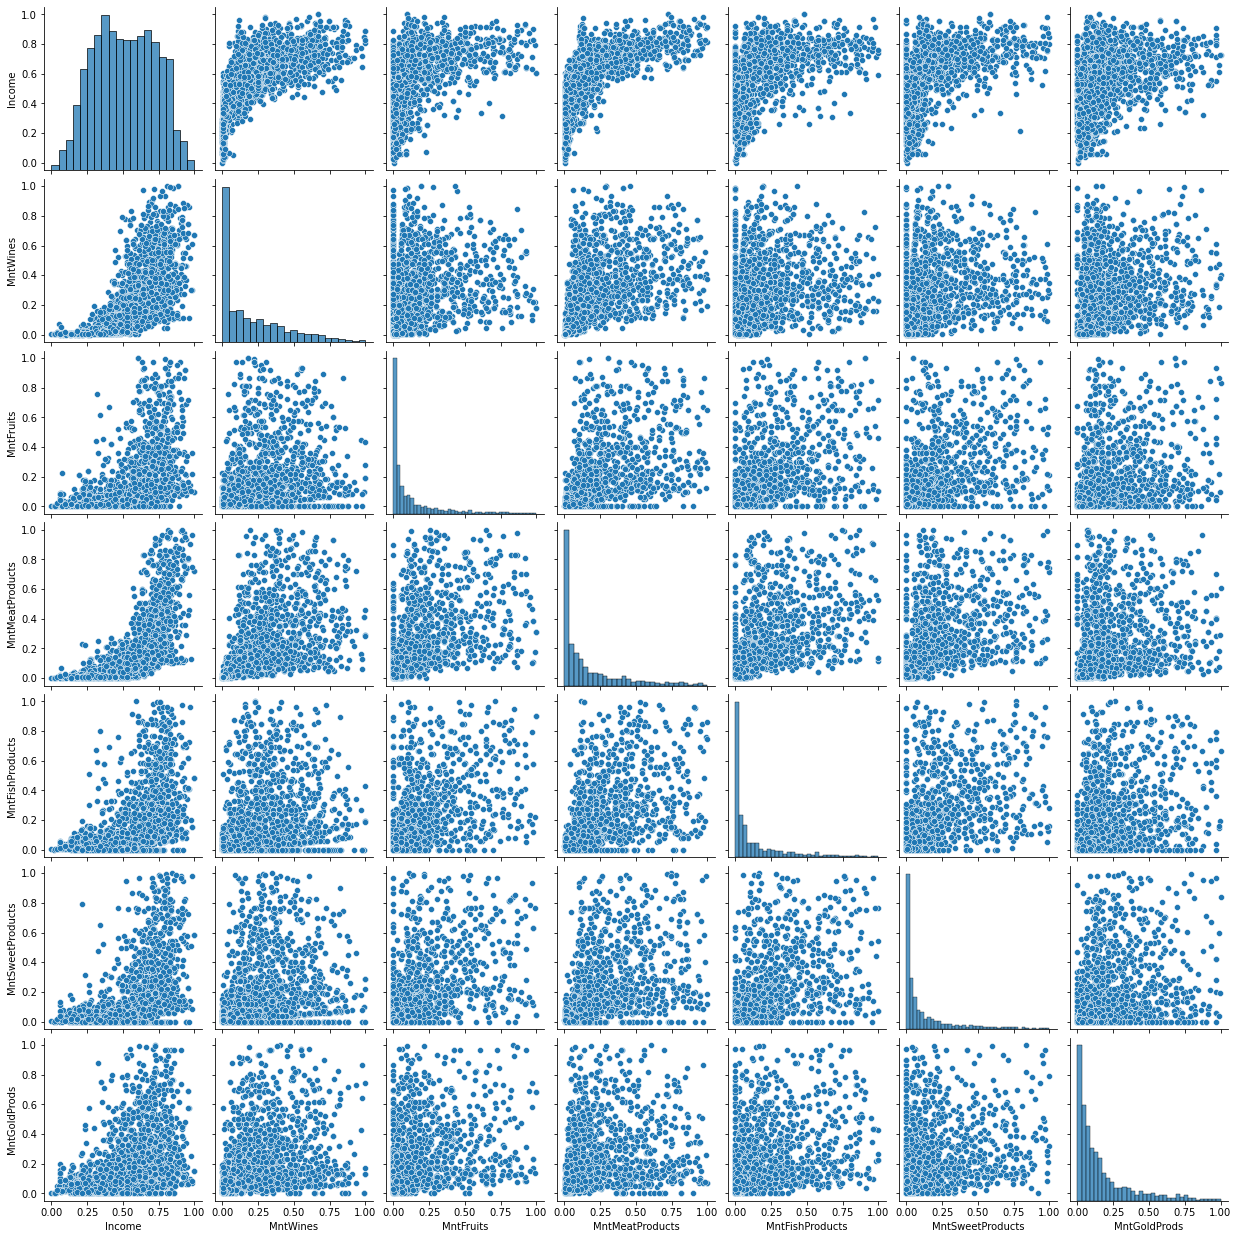

In [32]:
sns.pairplot(df_test)

In [ ]:
df_test = dfram[[ 'Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth','AcceptedCmp3', 'AcceptedCmp5',
       'Year_joined', 'Month_joined', 'Day_joined','Recency']]

f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(df_test.corr(), annot = True, vmin = -1, vmax = 1, center=0)

# Since our features all have pretty low correlation to the response column, we wanted to choose variables that had good correlatoins
# between each other. AcceptedCmp3, and 5 are the two variables that have the highest correlation with response so it made sense to use it 
# and it helps boost f1 score. Some variables such as month joined and day joined has small correlation but by trial and method they still 
# give contribution to increasing f1 so we kept it. The trial and error methods can be seen below. 

## Brute force method of trying out different parts - our purpose here is to find out which combinations yield the best accuracy and f-1 scores

## Income only

Train Accuracy:  0.8471192241871078
Test Accuracy:  0.8587699316628702


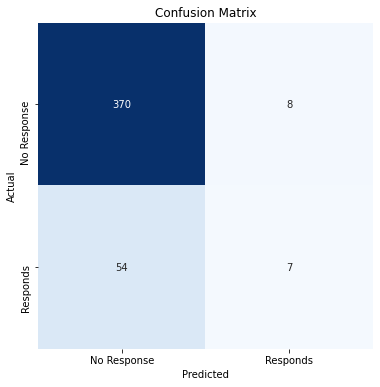


MSE Train:  0.1528807758128922
MSE Test:  0.14123006833712984


 Precision and Recall: 
              precision    recall  f1-score   support

 No Response       0.87      0.98      0.92       378
    Responds       0.47      0.11      0.18        61

    accuracy                           0.86       439
   macro avg       0.67      0.55      0.55       439
weighted avg       0.82      0.86      0.82       439



In [6]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error, r2_score

#how do we know what is the split size?
train, test = train_test_split(dfram, test_size = 0.2, random_state = 21)

'Year_Birth', 'Income', 'Kidhome', 'Teenhome'
X_train, X_test = train[['Income']], test[['Income']]
# X_train, X_test = train.drop(columns = ['Response']), test.drop(columns = ['Response'])
y_train, y_test = train['Response'], test['Response']


clf = MLPClassifier(hidden_layer_sizes=(15,15,),activation="relu",solver = 'sgd', learning_rate_init = 0.3, max_iter = 500, random_state=1)

clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
print("Train Accuracy: ", clf.score(X_train, y_train))
print("Test Accuracy: ", clf.score(X_test, y_test))


plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks=np.arange(2) + 0.5, labels=['No Response','Responds'])
plt.yticks(ticks=np.arange(2) + 0.5, labels=['No Response','Responds'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()



print("\nMSE Train: ", mean_squared_error(array(y_train), clf.predict(X_train)))
print("MSE Test: ", mean_squared_error(array(y_test), y_pred))

print("\n\n Precision and Recall: ")
print(classification_report(y_test, y_pred, target_names = ['No Response','Responds']))

## Income and customer identity [basic]

Train Accuracy:  0.8516828294352539
Test Accuracy:  0.8587699316628702


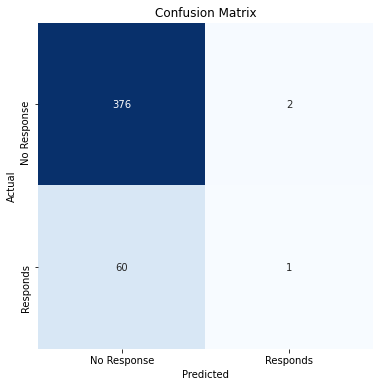


MSE Train:  0.14831717056474614
MSE Test:  0.14123006833712984


 Precision and Recall: 
              precision    recall  f1-score   support

 No Response       0.86      0.99      0.92       378
    Responds       0.33      0.02      0.03        61

    accuracy                           0.86       439
   macro avg       0.60      0.51      0.48       439
weighted avg       0.79      0.86      0.80       439



In [7]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error, r2_score

#how do we know what is the split size?
train, test = train_test_split(dfram, test_size = 0.2, random_state = 21)
X_train, X_test = train[['Year_Birth', 'Income', 'Kidhome', 'Teenhome']], test[['Year_Birth', 'Income', 'Kidhome', 'Teenhome']]
# X_train, X_test = train.drop(columns = ['Response']), test.drop(columns = ['Response'])
y_train, y_test = train['Response'], test['Response']


clf = MLPClassifier(hidden_layer_sizes=(15,15,),activation="relu",solver = 'sgd', learning_rate_init = 0.3, max_iter = 500, random_state=1)

clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
print("Train Accuracy: ", clf.score(X_train, y_train))
print("Test Accuracy: ", clf.score(X_test, y_test))


plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks=np.arange(2) + 0.5, labels=['No Response','Responds'])
plt.yticks(ticks=np.arange(2) + 0.5, labels=['No Response','Responds'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()



print("\nMSE Train: ", mean_squared_error(array(y_train), clf.predict(X_train)))
print("MSE Test: ", mean_squared_error(array(y_test), y_pred))

print("\n\n Precision and Recall: ")
print(classification_report(y_test, y_pred, target_names = ['No Response','Responds']))

## ## Income and customer identity [complex]

Train Accuracy:  0.8710781517398745
Test Accuracy:  0.8519362186788155


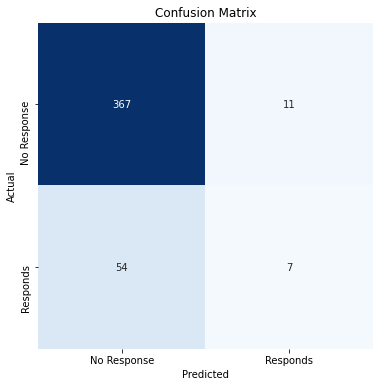


MSE Train:  0.1289218482601255
MSE Test:  0.1480637813211845


 Precision and Recall: 
              precision    recall  f1-score   support

 No Response       0.87      0.97      0.92       378
    Responds       0.39      0.11      0.18        61

    accuracy                           0.85       439
   macro avg       0.63      0.54      0.55       439
weighted avg       0.80      0.85      0.82       439



In [8]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error, r2_score

train, test = train_test_split(dfram, test_size = 0.2, random_state = 21)
X_train, X_test = train[['Year_Birth', 'Income', 'Kidhome', 'Teenhome','Divorced',
       'Married', 'Single', 'Together', 'Widow', 'Basic', 'Graduation',
       'Master', 'PhD']], test[['Year_Birth', 'Income', 'Kidhome', 'Teenhome','Divorced',
       'Married', 'Single', 'Together', 'Widow', 'Basic', 'Graduation',
       'Master', 'PhD']]

y_train, y_test = train['Response'], test['Response']


clf = MLPClassifier(hidden_layer_sizes=(15,15,),activation="relu",solver = 'sgd', learning_rate_init = 0.3, max_iter = 500, random_state=1)

clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
print("Train Accuracy: ", clf.score(X_train, y_train))
print("Test Accuracy: ", clf.score(X_test, y_test))


plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks=np.arange(2) + 0.5, labels=['No Response','Responds'])
plt.yticks(ticks=np.arange(2) + 0.5, labels=['No Response','Responds'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()



print("\nMSE Train: ", mean_squared_error(array(y_train), clf.predict(X_train)))
print("MSE Test: ", mean_squared_error(array(y_test), y_pred))

print("\n\n Precision and Recall: ")
print(classification_report(y_test, y_pred, target_names = ['No Response','Responds']))

## Income and products bought -highest importance for now - 0.35 f-1 for individual but + recency its ~0.4 while with accepted prev promotions we get 0.58 for all 3 combined
## Best combination in entire sample for f-1

Train Accuracy:  0.9315459212778094
Test Accuracy:  0.8861047835990888


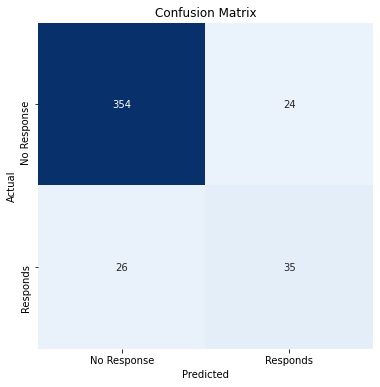


MSE Train:  0.06845407872219053
MSE Test:  0.11389521640091116


 Precision and Recall: 
              precision    recall  f1-score   support

 No Response       0.93      0.94      0.93       378
    Responds       0.59      0.57      0.58        61

    accuracy                           0.89       439
   macro avg       0.76      0.76      0.76       439
weighted avg       0.88      0.89      0.89       439



In [24]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error, r2_score

#how do we know what is the split size?
train, test = train_test_split(dfram, test_size = 0.2, random_state = 21)
X_train, X_test = train[[ 'Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth','AcceptedCmp3', 'AcceptedCmp5',
       'Year_joined', 'Month_joined', 'Day_joined','Recency']], test[[ 'Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth','AcceptedCmp3',  'AcceptedCmp5',
       'Year_joined', 'Month_joined', 'Day_joined','Recency']]
# X_train, X_test = train.drop(columns = ['Response']), test.drop(columns = ['Response'])
y_train, y_test = train['Response'], test['Response']


clf = MLPClassifier(hidden_layer_sizes=(15,15,),activation="relu",solver = 'sgd', learning_rate_init = 0.3, max_iter = 500, random_state=1)

clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
print("Train Accuracy: ", clf.score(X_train, y_train))
print("Test Accuracy: ", clf.score(X_test, y_test))


plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks=np.arange(2) + 0.5, labels=['No Response','Responds'])
plt.yticks(ticks=np.arange(2) + 0.5, labels=['No Response','Responds'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()



print("\nMSE Train: ", mean_squared_error(array(y_train), clf.predict(X_train)))
print("MSE Test: ", mean_squared_error(array(y_test), y_pred))

print("\n\n Precision and Recall: ")
print(classification_report(y_test, y_pred, target_names = ['No Response','Responds']))

## Income and complain

Train Accuracy:  0.8494010268111808
Test Accuracy:  0.8587699316628702


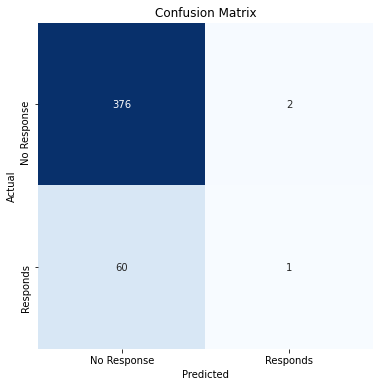


MSE Train:  0.15059897318881918
MSE Test:  0.14123006833712984


 Precision and Recall: 
              precision    recall  f1-score   support

 No Response       0.86      0.99      0.92       378
    Responds       0.33      0.02      0.03        61

    accuracy                           0.86       439
   macro avg       0.60      0.51      0.48       439
weighted avg       0.79      0.86      0.80       439



In [10]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error, r2_score

#how do we know what is the split size?
train, test = train_test_split(dfram, test_size = 0.2, random_state = 21)

'Year_Birth', 'Income', 'Kidhome', 'Teenhome'
X_train, X_test = train[['Income','Complain',]], test[['Income','Complain',]]
# X_train, X_test = train.drop(columns = ['Response']), test.drop(columns = ['Response'])
y_train, y_test = train['Response'], test['Response']


clf = MLPClassifier(hidden_layer_sizes=(15,15,),activation="relu",solver = 'sgd', learning_rate_init = 0.3, max_iter = 500, random_state=1)

clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
print("Train Accuracy: ", clf.score(X_train, y_train))
print("Test Accuracy: ", clf.score(X_test, y_test))


plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks=np.arange(2) + 0.5, labels=['No Response','Responds'])
plt.yticks(ticks=np.arange(2) + 0.5, labels=['No Response','Responds'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()



print("\nMSE Train: ", mean_squared_error(array(y_train), clf.predict(X_train)))
print("MSE Test: ", mean_squared_error(array(y_test), y_pred))

print("\n\n Precision and Recall: ")
print(classification_report(y_test, y_pred, target_names = ['No Response','Responds']))

## Income and customer cycle - improving f1 - booster

Train Accuracy:  0.8608100399315459
Test Accuracy:  0.8610478359908884


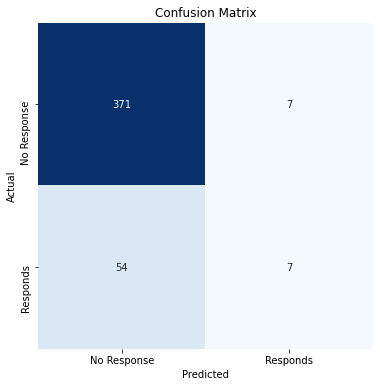


MSE Train:  0.13918996006845408
MSE Test:  0.13895216400911162


 Precision and Recall: 
              precision    recall  f1-score   support

 No Response       0.87      0.98      0.92       378
    Responds       0.50      0.11      0.19        61

    accuracy                           0.86       439
   macro avg       0.69      0.55      0.56       439
weighted avg       0.82      0.86      0.82       439



In [11]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error, r2_score

#how do we know what is the split size?
train, test = train_test_split(dfram, test_size = 0.2, random_state = 21)


X_train, X_test = train[['Income','Year_joined', 'Month_joined', 'Day_joined','Recency']], test[['Income','Year_joined', 'Month_joined', 'Day_joined','Recency']]
# X_train, X_test = train.drop(columns = ['Response']), test.drop(columns = ['Response'])
y_train, y_test = train['Response'], test['Response']


clf = MLPClassifier(hidden_layer_sizes=(15,15,),activation="relu",solver = 'sgd', learning_rate_init = 0.3, max_iter = 500, random_state=1)

clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
print("Train Accuracy: ", clf.score(X_train, y_train))
print("Test Accuracy: ", clf.score(X_test, y_test))


plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks=np.arange(2) + 0.5, labels=['No Response','Responds'])
plt.yticks(ticks=np.arange(2) + 0.5, labels=['No Response','Responds'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()



print("\nMSE Train: ", mean_squared_error(array(y_train), clf.predict(X_train)))
print("MSE Test: ", mean_squared_error(array(y_test), y_pred))

print("\n\n Precision and Recall: ")
print(classification_report(y_test, y_pred, target_names = ['No Response','Responds']))

## Income and Campaign - good f-1 0.59 with recency   0.31 by itself    ok 0.3 for accepted 3,5

Train Accuracy:  0.8539646320593268
Test Accuracy:  0.8747152619589977


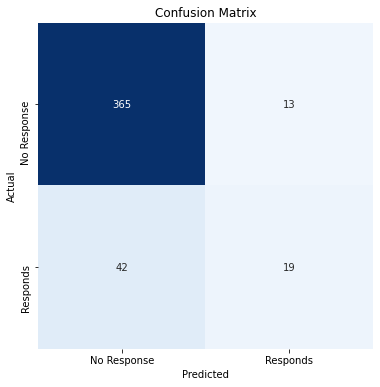


MSE Train:  0.14603536794067312
MSE Test:  0.1252847380410023


 Precision and Recall: 
              precision    recall  f1-score   support

 No Response       0.90      0.97      0.93       378
    Responds       0.59      0.31      0.41        61

    accuracy                           0.87       439
   macro avg       0.75      0.64      0.67       439
weighted avg       0.85      0.87      0.86       439



In [12]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error, r2_score

#how do we know what is the split size?
train, test = train_test_split(dfram, test_size = 0.2, random_state = 21)

'Year_Birth', 'Income', 'Kidhome', 'Teenhome'
X_train, X_test = train[[ 'AcceptedCmp3','AcceptedCmp5',]], test[[ 'AcceptedCmp3', 'AcceptedCmp5']]
# X_train, X_test = train.drop(columns = ['Response']), test.drop(columns = ['Response'])
y_train, y_test = train['Response'], test['Response']


clf = MLPClassifier(hidden_layer_sizes=(15,15,),activation="relu",solver = 'sgd', learning_rate_init = 0.3, max_iter = 500, random_state=1)

clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
print("Train Accuracy: ", clf.score(X_train, y_train))
print("Test Accuracy: ", clf.score(X_test, y_test))


plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks=np.arange(2) + 0.5, labels=['No Response','Responds'])
plt.yticks(ticks=np.arange(2) + 0.5, labels=['No Response','Responds'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()



print("\nMSE Train: ", mean_squared_error(array(y_train), clf.predict(X_train)))
print("MSE Test: ", mean_squared_error(array(y_test), y_pred))

print("\n\n Precision and Recall: ")
print(classification_report(y_test, y_pred, target_names = ['No Response','Responds']))